# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [100]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [101]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [102]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [103]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [104]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
475,97.0,55,104,219,71,9,211,32,24,171,222,658,223,74,1,24,186,196
106,99.0,46,105,209,64,11,197,34,23,152,212,575,159,65,0,33,194,205
282,86.0,46,73,125,57,6,151,45,19,147,170,334,188,82,9,11,180,184
266,86.0,42,65,116,53,6,152,45,19,141,175,335,172,85,5,4,179,183
468,105.0,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
12,88.0,46,74,171,68,6,152,43,19,148,180,349,192,71,5,11,189,195
650,98.0,55,104,213,67,9,206,32,23,167,223,629,220,72,5,19,187,196
651,85.0,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
832,108.0,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199
200,93.0,47,85,163,66,11,156,44,20,158,172,355,178,74,7,15,183,195


Methods `describe` and `info` deliver some useful information.

In [105]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,548.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.490876,44.956284,81.655738,168.247723,62.072860,8.730419,167.775956,41.375228,20.573770,147.739526,188.158470,435.734062,175.358834,72.752277,6.417122,12.367942,188.471767,195.428051
std,8.251858,6.560631,16.018690,33.866427,10.030891,5.623871,34.101594,9.439850,2.721992,15.319216,31.988913,177.389408,34.069763,8.169990,5.536785,8.854633,9.455313,7.377022
min,76.000000,33.000000,36.000000,73.000000,48.000000,2.000000,6.000000,26.000000,17.000000,20.000000,127.000000,184.000000,109.000000,60.000000,0.000000,0.000000,19.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,362.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,99.000000,50.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,216.000000,579.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,117.000000,100.000000,110.000000,333.000000,199.000000,73.000000,265.000000,162.000000,40.000000,186.000000,320.000000,1018.000000,401.000000,135.000000,72.000000,41.000000,206.000000,211.000000


In [106]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 475 to 316
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       548 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [107]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

### There is a NAN in the X_train data and also the number of rows is not the same as y_train,
### so a transformation is needed

train_data = pd.concat([X_train, y_train], axis=1)
train_data_clean = train_data.dropna()
X_train = train_data_clean.iloc[:, :-1]
y_train = train_data_clean.iloc[:, -1]

test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.dropna()
X_test = test_data_clean.iloc[:, :-1 ]
y_test = test_data_clean.iloc[:, -1]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [108]:
### YOUR CODE HERE

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'l1']
}

# Note: We are using the specified hyperparameters for logistic regression
logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2', 'l1']})

Cross-Validation Accuracy: 0.724 +/- 0.017
Cross-Validation F1 Score: 0.708 +/- 0.020
Test Accuracy: 0.731
Test F1 Score: 0.730


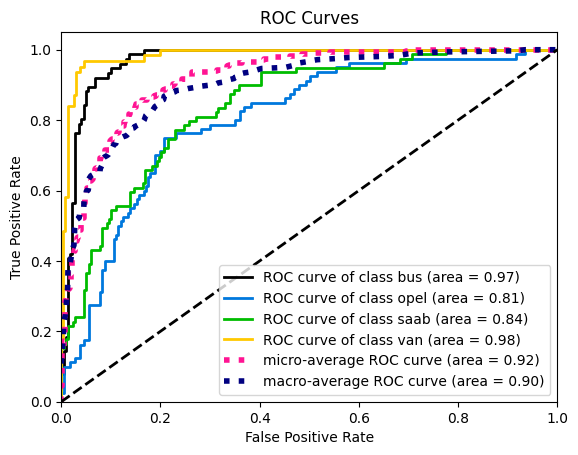

In [109]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

best_model = grid_search.best_estimator_

cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.3f} +/- {cv_accuracy.std():.3f}")
print(f"Cross-Validation F1 Score: {cv_f1.mean():.3f} +/- {cv_f1.std():.3f}")

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")

plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

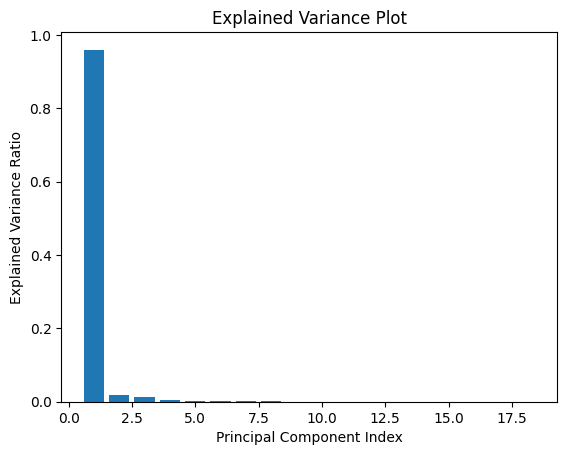

In [110]:
### YOUR CODE HERE
# Apply PCA
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Plot')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [119]:
### YOUR CODE HERE
# Select components that explain 99% of the variance
pca = PCA(0.99).fit(X_train)
print("Number of components selected:", pca.n_components_)
# Assuming you have chosen the number of components based on the above steps
n_components = pca.n_components_

# Create a new PCA object with the chosen number of components
pca_final = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca = pca_final.fit_transform(X_train)

# Transform the test data
X_test_pca = pca_final.transform(X_test)

Number of components selected: 4


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Test Accuracy: 0.485
Test F1 Score: 0.463


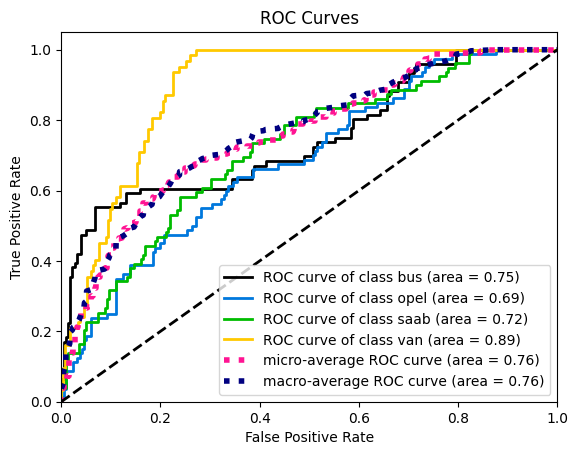

In [120]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt
import numpy as np

# Define the pipeline steps
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=10000)


# Define hyperparameter grids
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
}

# Perform grid search
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, error_score='raise')
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test_pca)
y_pred_proba = best_model.predict_proba(X_test_pca)

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")

# Plot the ROC curve
plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

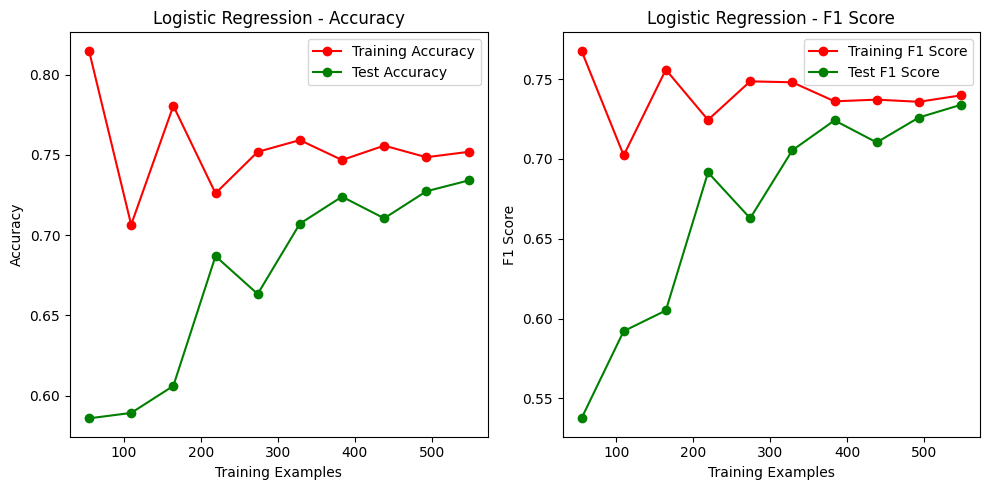

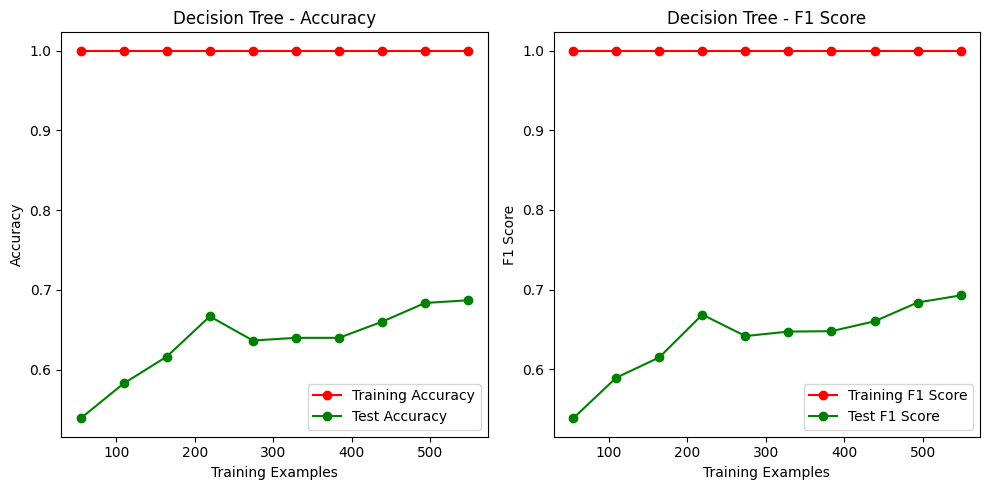

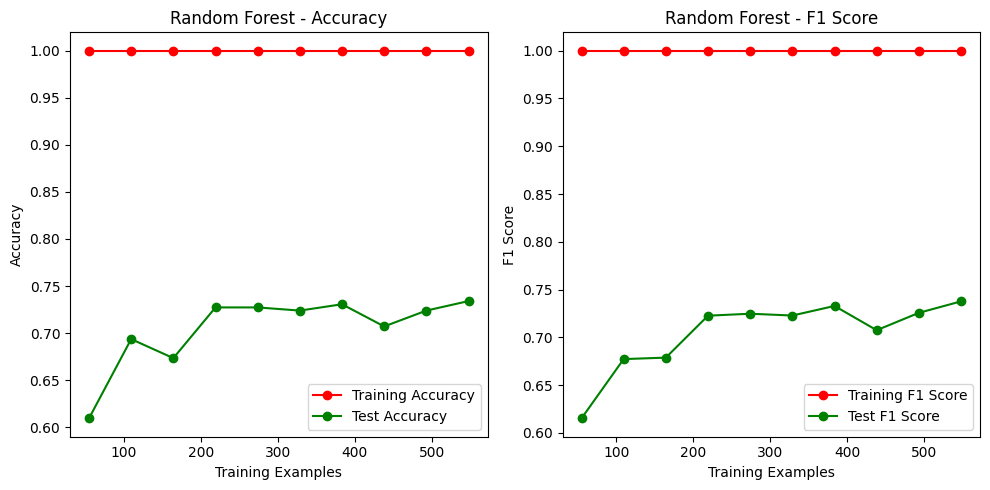

In [121]:
# YOUR CODE HERE

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, title, X, y, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_accuracy_scores = []
    test_accuracy_scores = []
    train_f1_scores = []
    test_f1_scores = []

    for size in train_sizes:
        indices = np.random.choice(X.index, int(size * len(X)), replace=False)
        X_train_subset = X.loc[indices]
        y_train_subset = y.loc[indices]

        model.fit(X_train_subset, y_train_subset)
        y_pred_train = model.predict(X_train_subset)
        y_pred_test = model.predict(X_test)

        train_accuracy = accuracy_score(y_train_subset, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_f1 = f1_score(y_train_subset, y_pred_train, average='macro')
        test_f1 = f1_score(y_test, y_pred_test, average='macro')

        train_accuracy_scores.append(train_accuracy)
        test_accuracy_scores.append(test_accuracy)
        train_f1_scores.append(train_f1)
        test_f1_scores.append(test_f1)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_sizes * len(X), train_accuracy_scores, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes * len(X), test_accuracy_scores, 'o-', color="g", label="Test Accuracy")
    plt.title(title + " - Accuracy")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes * len(X), train_f1_scores, 'o-', color="r", label="Training F1 Score")
    plt.plot(train_sizes * len(X), test_f1_scores, 'o-', color="g", label="Test F1 Score")
    plt.title(title + " - F1 Score")
    plt.xlabel("Training Examples")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

# Define the models with optimal hyperparameters
logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=10000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Plot learning curves for each model
plot_learning_curve(logistic_regression, "Logistic Regression", X_train, y_train, X_test, y_test)
plot_learning_curve(decision_tree, "Decision Tree", X_train, y_train, X_test, y_test)
plot_learning_curve(random_forest, "Random Forest", X_train, y_train, X_test, y_test)

### Conclusion
All results increase convergence as the dataset size increases, and it is maintained above 70%. This indicates that the models are correctly trained.  

The training result for Decision Tree and Random forest is 1. This may indicate overtraining, but since convergence increases with increasing data, everything is fine. 